# 目次

目的

データの読み込み

データ概要の確認

探索的分析（EDA）
- 基本統計量
- 分布の確認
- quality別の分布比較

仮説と検証
- 仮説の設定
- 散布図と相関による検証

まとめ
- 分かったこと
- 限界
- 次の一手


# 目的
ワインの化学特性と品質スコアの関係を探索的に分析する。


## データの読み込み

このセクションでは、CSVデータを読み込み、列構成と基本情報を確認する。


In [5]:
# CSVデータを読み込む
# データの先頭を確認する
# 行数・列数・列名を把握する
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/winequality-red.csv")

print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
print(df.columns)
print(df.shape)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


# 探索的分析（EDA）

In [7]:
# 基本統計量を確認する
print(df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

total sulfur dioxideとresidual sugar の分布を確認する。
外れ値やロングテールがあるかを見る。


<Axes: >

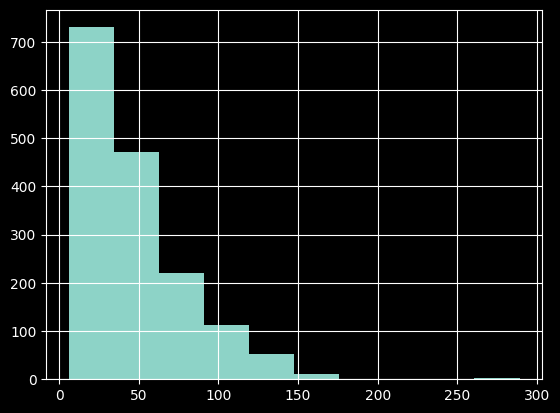

In [8]:
df['total sulfur dioxide'].hist()

結果：
total sulfur dioxide は低値に集中し、右に長いロングテールを持つ分布である。

residual sugar の分布を確認する。
外れ値やロングテールがあるかを見る。

<Axes: >

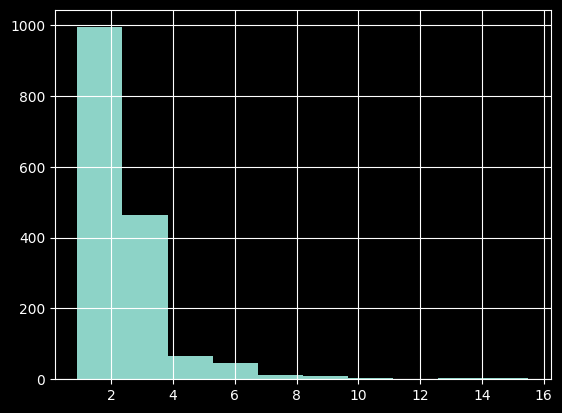

In [9]:
df['residual sugar'].hist()

結果：residual sugar は低値に集中し、右に長いロングテールを持つ分布である。

qualityごとにtotal sulfur dioxideの分布を箱ひげ図で確認する

<Axes: title={'center': 'total sulfur dioxide'}, xlabel='quality'>

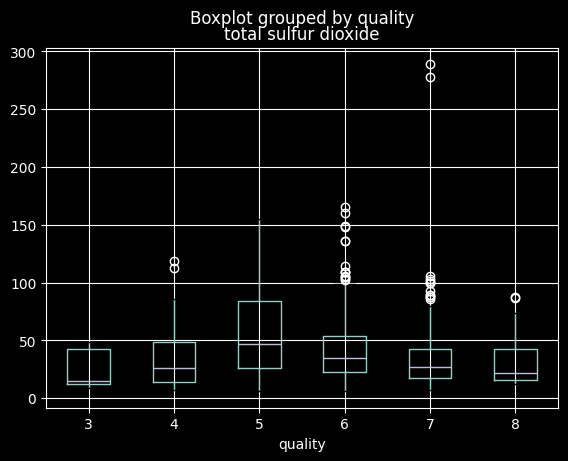

In [10]:
df.boxplot(column="total sulfur dioxide", by="quality")


結果：quality ごとの箱ひげ図を見ると、total sulfur dioxide は quality が高い群ほど中央値が低めに見える。
また、quality が中程度の群では高値側に外れ値が多く、分布のばらつきが大きい。
ただし、箱ひげ図は分布の要約であり、quality との関係の強さや因果関係は判断できない。

qualityごとにresidual sugarの分布を箱ひげ図で確認する

<Axes: title={'center': 'residual sugar'}, xlabel='quality'>

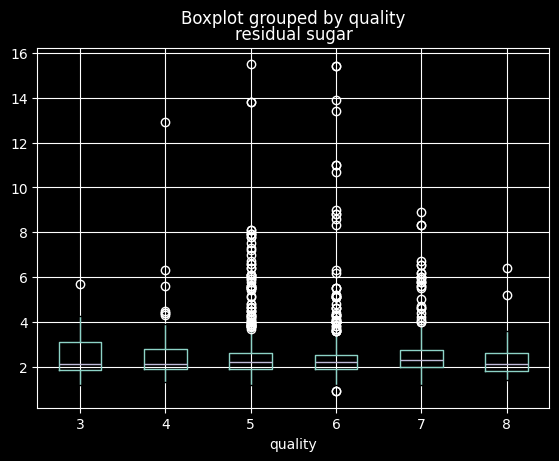

In [11]:
df.boxplot(column="residual sugar", by="quality")


結果：quality ごとの箱ひげ図を見ると、residual sugar は quality のどの群でも中央値の差が小さい。
また、quality が中程度の群では高値側に外れ値が見られる一方で、箱の範囲（IQR）は比較的狭く、中心部分のばらつきは小さい。
ただし、箱ひげ図は分布の要約であり、quality との関係の強さや因果関係は判断できない。

# 仮説と検証

仮説：箱ひげ図から判断すると、両変数とも強い相関関係は明確には見られない。
ただし、total sulfur dioxide については、quality が高い群で中央値が低めに分布しており、中央値の水準とは一定の関係がありそうに見える。
一方、residual sugar は quality のどの群においても中央値に大きな差がなく、IQRにも明確な違いが見られないため、quality との関係は比較的弱いと考えられる。

以上の観察を踏まえ、次に相関係数を用いて、これらの傾向が数値的にも確認できるかを検証する。

quality × total sulfur dioxideの散布図を描き、相関係数を求める。

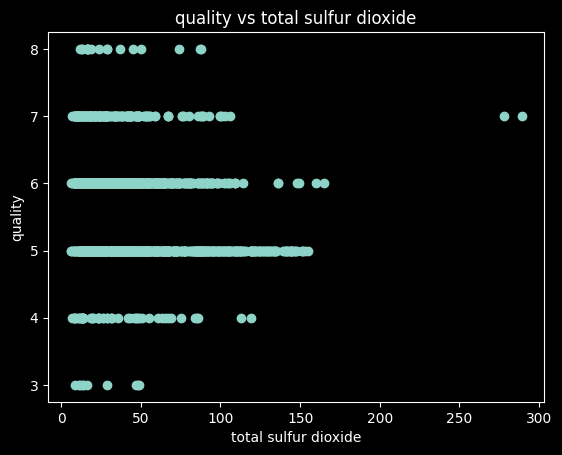

Pearson correlation (total sulfur dioxide vs quality): -0.18510028892653785


In [12]:
# quality × total sulfur dioxide の散布図を描き、相関係数（Pearson）を求める


x = df["total sulfur dioxide"]
y = df["quality"]

plt.figure()
plt.scatter(x, y)
plt.xlabel("total sulfur dioxide")
plt.ylabel("quality")
plt.title("quality vs total sulfur dioxide")
plt.show()

corr = x.corr(y)  # Pearson
print("Pearson correlation (total sulfur dioxide vs quality):", corr)

仮説検証：total sulfur dioxide と quality の間には弱い負の関係が示唆されるが、相関は強くなく、品質を単独で説明できるほどではない。

quality × residual sugarの散布図を描き、相関係数を求める

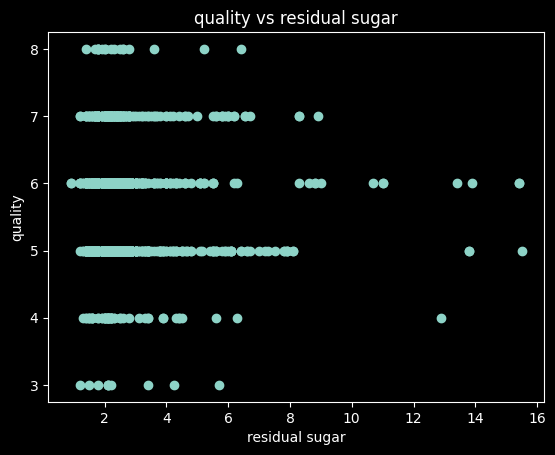

Pearson correlation (residual sugar vs quality): 0.013731637340066277


In [13]:
# quality × residual sugar の散布図を描き、相関係数（Pearson）を求める


x = df["residual sugar"]
y = df["quality"]

plt.figure()
plt.scatter(x, y)
plt.xlabel("residual sugar")
plt.ylabel("quality")
plt.title("quality vs residual sugar")
plt.show()

corr = x.corr(y)  # Pearson
print("Pearson correlation (residual sugar vs quality):", corr)

仮説検証：residual sugar と quality の間には明確な関係は見られず、相関係数もほぼゼロであることから、品質との関連は弱いと考えられる

# まとめ

**分かったこと**
- total sulfur dioxide は quality と弱い負の関係が示唆された（相関係数 −0.185）。
- residual sugar は quality との関係が非常に弱い（相関係数 0.014）。

**限界**
- 相関はいずれも弱く、因果関係は判断できない。
- quality は離散値であり、外れ値や分布の歪みの影響が残る可能性がある。

**次の一手**
- 他の化学特性を含めた多変量での検証。
- 条件分けやモデル化による関係性の再確認。
